# Regression for Data Cleaning Approach 1 (Categorized Data)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import psycopg2
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
%matplotlib inline

In [4]:
data = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/clean_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Artist_ID,Index,User_ID,Track,Time,Rating,HEARD_OF,Edgy_,Negative_,Sensitive_,...,Male,Midlands,North,North Ireland,Northern Ireland,South,Music has no particular interest for me,Music is important to me but not necessarily more important,Music is no longer as important as it used to be to me,Music means a lot to me and is a passion of mine
0,1.0,163270,3566.0,5,18,41,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3.0,159391,3566.0,9,18,16,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,144298,3566.0,4,18,44,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4.0,74698,3566.0,11,18,71,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,14.0,173934,11495.0,32,19,42,1,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
data.shape

(111460, 48)

In [6]:
n_users = data.User_ID.nunique()
n_artists = data.Artist_ID.nunique()

In [7]:
# Take a quick look at the sparsity of our dataset.
sparsity=round(1.0-len(data)/float(n_users*n_artists),3)
print('The sparsity level of the dataset is ' +  str(sparsity*100) + '%')

The sparsity level of the dataset is 91.2%


In [9]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [10]:
result = data['Artist_ID'].unique()

In [11]:
## Double-checking number of artists we're using in our final dataset.
counteryes = 0
counterno = 0
for ID in range(0,50,1):    #50 total artist IDs, ranging from 0 to 49:
    if ID in result:
        counteryes +=1
    else:
        counterno += 1
        print 'OUT: {}'.format(ID)
        
print "Percent of artists remaining in dataset: {:.2%}".format(float(counteryes) / (counteryes + counterno))

OUT: 26
OUT: 27
OUT: 28
OUT: 29
OUT: 30
OUT: 34
OUT: 35
OUT: 36
OUT: 37
OUT: 38
OUT: 39
Percent of artists remaining in dataset: 78.00%


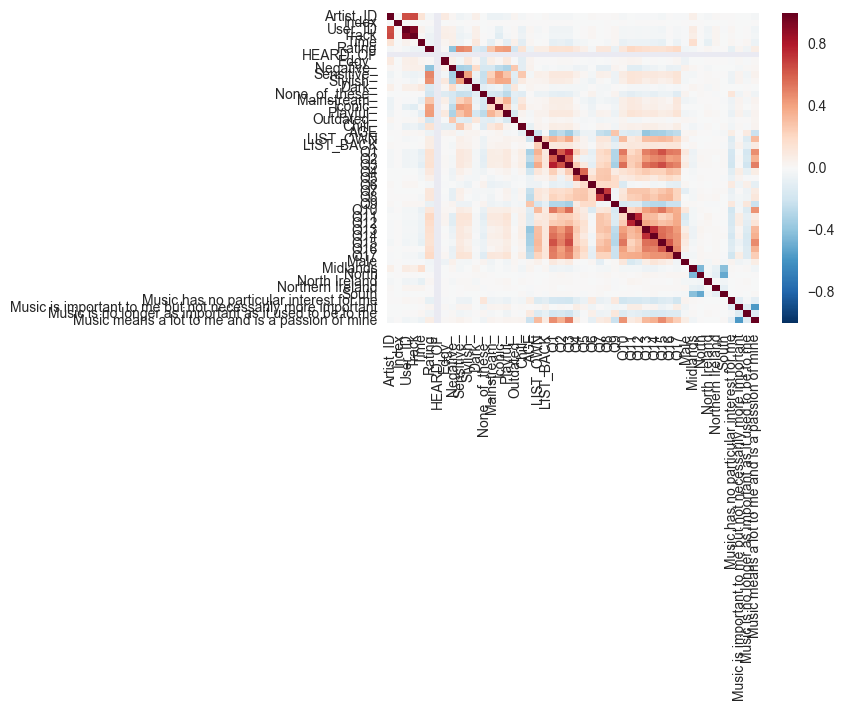

In [178]:
sns.heatmap(data.corr())

In [12]:
# Split training and testing data
X = data.drop(['Rating','Index'], axis=1)
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Linear Regression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#Regression intercept
lr.intercept_

0.19137614991031704

In [30]:
coeff_data = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_data

,Coefficient
Artist_ID,3.898777e-04
User_ID,1.087851e-06
Track,-2.817377e-04
Time,2.305817e-04
HEARD_OF,-2.608867e-14
Edgy_,-1.377526e-02
Negative_,-8.425190e-02
Sensitive_,9.756986e-02
Stylish_,7.234689e-02
Dark_,-3.342387e-02


In [31]:
predictions = lr.predict(X_test)

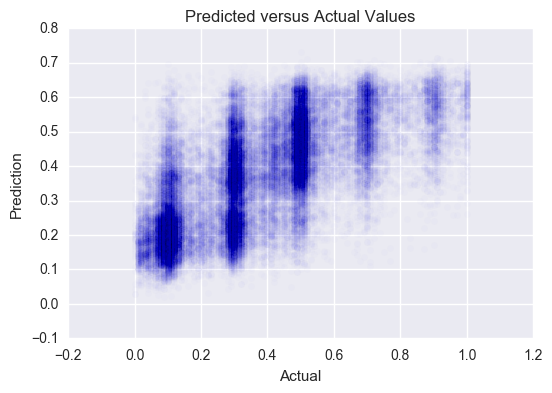

In [32]:
plt.scatter(y_test, predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values")

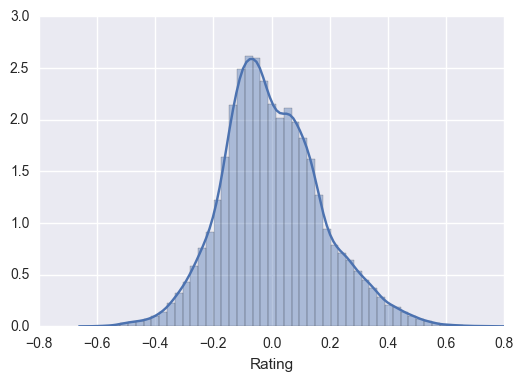

In [33]:
# Residual histogram
sns.distplot((y_test-predictions),bins=50);

## Linear Regression Performance

In [21]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 0.13555552092468848)
('MSE:', 0.029657771098114682)
('RMSE:', 0.17221431734357825)


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [15]:
reg_RF = RandomForestRegressor(n_estimators=2000, n_jobs=3)

In [17]:
reg_RF.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=3, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [18]:
RF_predictions = reg_RF.predict(X_test)

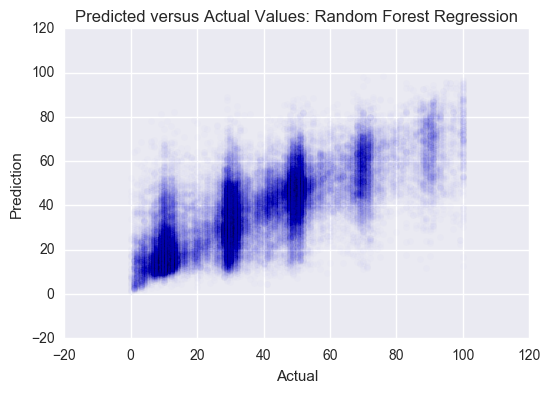

In [19]:
plt.scatter(y_test, RF_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression")

In [22]:
print 'MAE:', metrics.mean_absolute_error(y_test, RF_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, RF_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predictions))

MAE: 11.4461687825
MSE: 234.911119103
RMSE: 15.3268104674


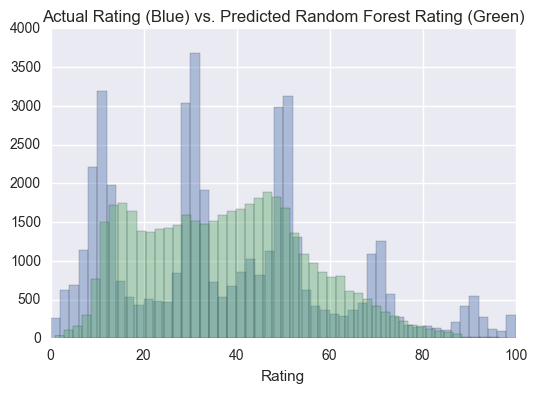

In [80]:
sns.distplot(y_test, kde=False)
sns.distplot(RF_predictions, kde=False)
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

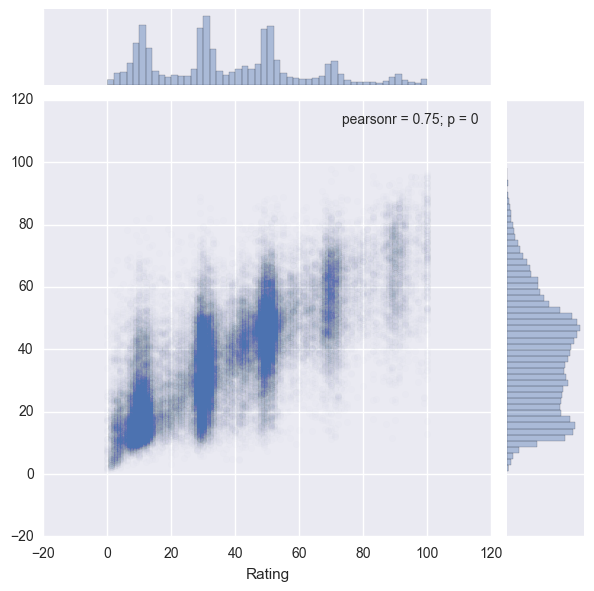

In [24]:
sns.jointplot(y_test, RF_predictions, alpha=0.01)

# Random Forests with Max Depth Limits

**This approach to random forests, as seen below, didn't work particularly well compared to allowing trees to run to a maximum depth.**

In [143]:
reg_RF_md = RandomForestRegressor(n_estimators=2000, max_depth=4)

In [144]:
reg_RF_md.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [145]:
RF_md_predictions = reg_RF_md.predict(X_test)

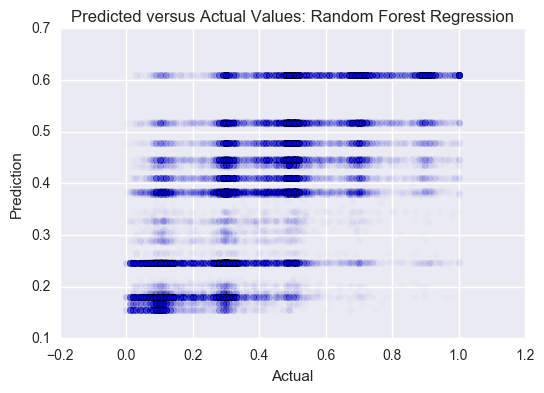

In [146]:
plt.scatter(y_test, RF_md_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression")

In [147]:
print 'MAE:', metrics.mean_absolute_error(y_test, RF_md_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, RF_md_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_md_predictions))

MAE: 0.140656839813
MSE: 0.0315389659678
RMSE: 0.177592133744


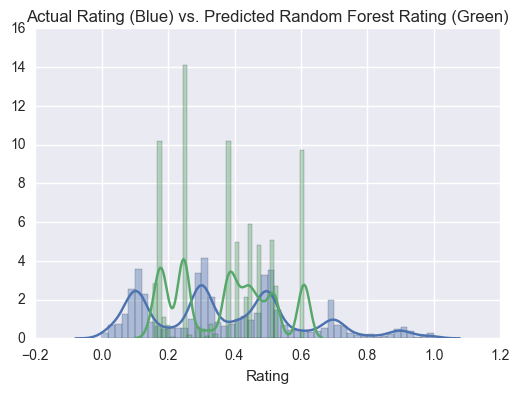

In [148]:
sns.distplot(y_train)
sns.distplot(RF_md_predictions)
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

## Computing Random Forest with Top 26 Features (>0.01)

In [25]:
feat_imp = reg_RF.feature_importances_

In [26]:
rf_df = pd.DataFrame(data=feat_imp).T
rf_df.columns = X_train.columns
rf_df = rf_df.T
rf_df.columns = ['Feature_Importance']

In [27]:
top_features = rf_df.sort_values(by='Feature_Importance', ascending=False)[:26].T.columns

In [92]:
top_to_plot = rf_df.sort_values(by='Feature_Importance', ascending=False)[:5]

In [93]:
top_to_plot['Feature_Importance'][:]

Sensitive_    0.232400
Playful_      0.077655
Track         0.061903
Stylish_      0.045223
Negative_     0.039662
Name: Feature_Importance, dtype: float64

In [78]:
#Plot top features
labels = ['Sensitive', 'Playful', 'Track', 'Stylish', 'Negative']

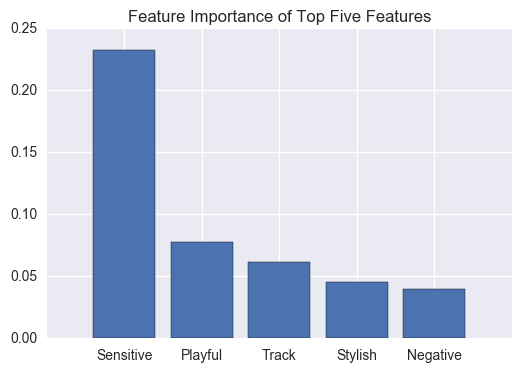

In [79]:
plt.bar([0, 1, 2, 3, 4], list(top_to_plot['Feature_Importance']), align = 'center', tick_label = labels)
plt.title('Feature Importance of Top Five Features');

In [28]:
# Split training and testing data
X_tf = data[top_features]
y_tf = data['Rating']
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.4, random_state=101)

In [32]:
reg_RF_tf = RandomForestRegressor(n_estimators=2000)
reg_RF_tf.fit(X_tf_train, y_tf_train)
RF_tf_predictions = reg_RF_tf.predict(X_tf_test)

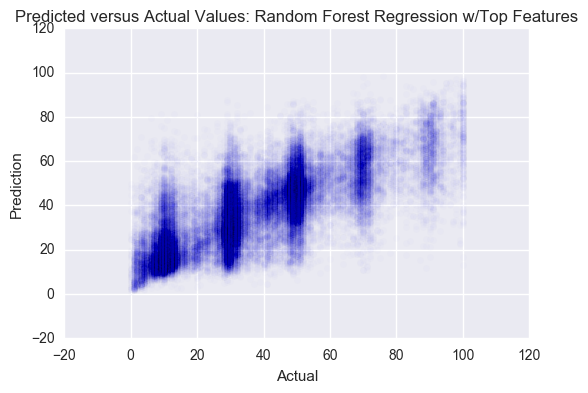

In [33]:
plt.scatter(y_tf_test, RF_tf_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression w/Top Features")

In [34]:
print 'MAE:', metrics.mean_absolute_error(y_test, RF_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, RF_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predictions))

MAE: 11.4461687825
MSE: 234.911119103
RMSE: 15.3268104674


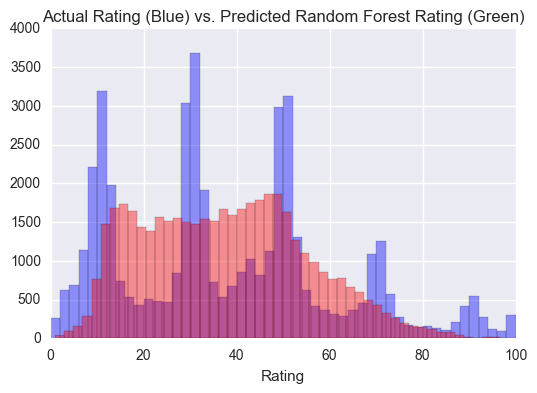

In [99]:
sns.distplot(y_tf_test, kde=False, color='b')
sns.distplot(RF_tf_predictions, kde=False, color='r')
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

## Random Forest with Truncated Limbs

In [132]:
reg_RF_tf_t = RandomForestRegressor(n_estimators=2000, max_depth=8)
reg_RF_tf_t.fit(X_tf_train, y_tf_train)
RF_tf_t_predictions = reg_RF_tf_t.predict(X_tf_test)

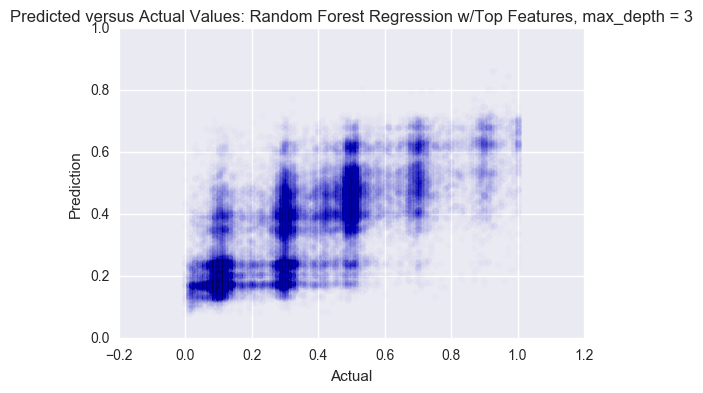

In [133]:
plt.scatter(y_tf_test, RF_tf_t_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression w/Top Features, max_depth = 3")

In [134]:
print 'MAE:', metrics.mean_absolute_error(y_tf_test, RF_tf_t_predictions)
print 'MSE:', metrics.mean_squared_error(y_tf_test, RF_tf_t_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_tf_t_predictions))

MAE: 0.133142140583
MSE: 0.0283959215276
RMSE: 0.168510894388


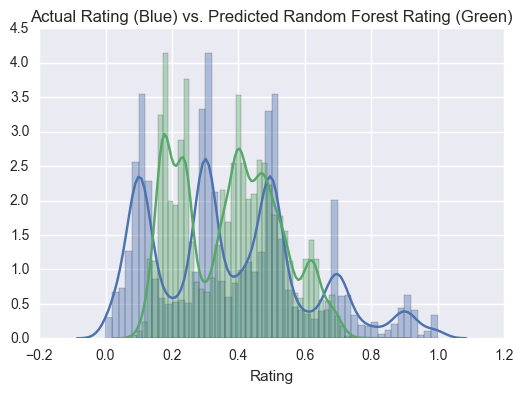

In [135]:
sns.distplot(y_tf_test)
sns.distplot(RF_tf_t_predictions)
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

# Gradient Booster

In [218]:
#GBR = GradientBoostingRegressor(n_estimators=200, learning_rate=0.4,\
#                                max_depth=6, random_state=0, loss='ls').fit(X_train, y_train)
# RMSE of above is 15.6581
GBR = GradientBoostingRegressor()
GBR.set_params(n_estimators=200, learning_rate=0.1, warm_start=True,\
                                random_state=0, loss='ls')
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=True)

In [219]:
GBR_predictions = GBR.predict(X_test)
for i in GBR_predictions:
    if i < 0:
        i = 0
    else:
        i = i

In [220]:
GBR_predictions

array([ 63.82708427,  43.42628342,  20.25042442, ...,  13.16660484,
        15.30486658,  22.71429039])

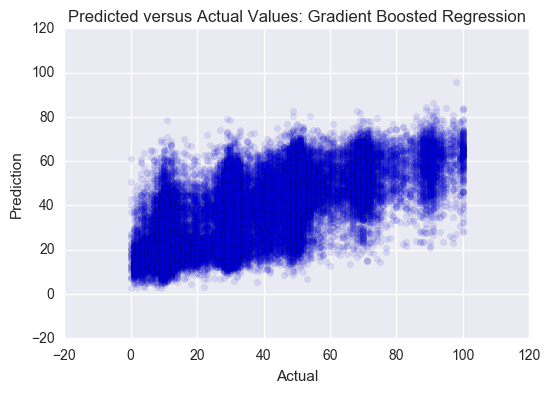

In [221]:
plt.scatter(y_test, GBR_predictions, alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Gradient Boosted Regression")

In [222]:
print 'MAE:', metrics.mean_absolute_error(y_test, GBR_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, GBR_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBR_predictions))

MAE: 12.9417003022
MSE: 270.980367682
RMSE: 16.4614813331


In [235]:
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': GBR.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending = False)

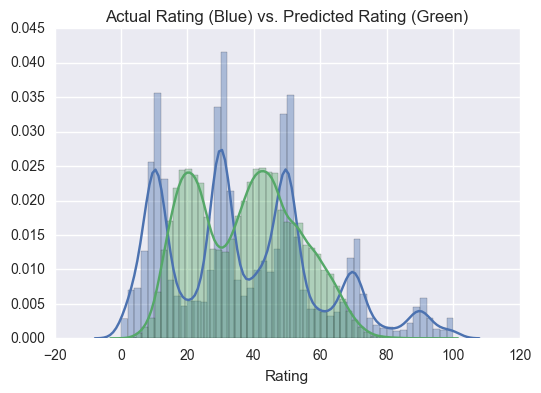

In [223]:
sns.distplot(y_train)
sns.distplot(GBR_predictions)
plt.title('Actual Rating (Blue) vs. Predicted Rating (Green)');

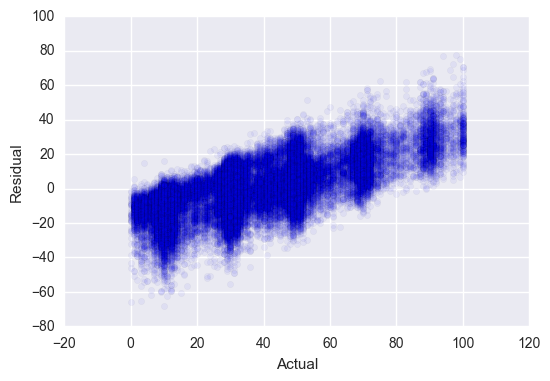

In [216]:
# Residual histogram
plt.scatter(y_test,(y_test-GBR_predictions), alpha=0.05)
plt.xlabel('Actual')
plt.ylabel('Residual');

# The two random forest regressions have the lowest RMSE

I'll move the predictions to a csv file so that they can be compared across the other modeled dataset.

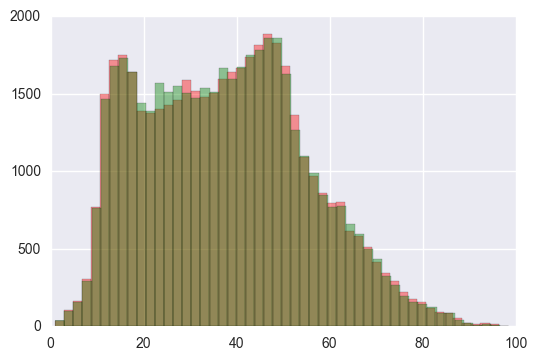

In [84]:
sns.distplot(RF_predictions, kde=False, color='r')
sns.distplot(RF_tf_predictions, kde=False, color='g')